In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/turkey_earthquakes(1915-2021).csv'
earthquake_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure and contents
earthquake_data.head()

,No;Deprem Kodu;Olus tarihi;Olus zamani;Enlem;Boylam;Derinlik;xM;MD;ML;Mw;Ms;Mb;Tip;Yer
0,1;2.02101E+13;2021.01.01;16:36:21.41;35.9273;2...
1,2;2.02012E+13;2020.12.31;00:51:27.94;37.8435;2...
2,3;2.02012E+13;2020.12.30;18:45:12.79;36.4918;2...
3,4;2.02012E+13;2020.12.30;13:40:12.22;37.796;26...
4,5;2.02012E+13;2020.12.27;20:08:36.88;38.4172;3...


In [ ]:
# Correctly loading the dataset with the right delimiter
earthquake_data = pd.read_csv(file_path, delimiter=';')

# Displaying the first few rows of the dataset again to confirm correct loading
earthquake_data.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021.01.01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2020.12.31,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020.12.30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020.12.30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020.12.27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [ ]:
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           17370 non-null  int64  
 1   Deprem Kodu  17370 non-null  float64
 2   Olus tarihi  17370 non-null  object 
 3   Olus zamani  17370 non-null  object 
 4   Enlem        17370 non-null  float64
 5   Boylam       17370 non-null  float64
 6   Derinlik     17370 non-null  float64
 7   xM           17370 non-null  float64
 8   MD           17370 non-null  float64
 9   ML           17370 non-null  float64
 10  Mw           4645 non-null   float64
 11  Ms           17370 non-null  float64
 12  Mb           17370 non-null  float64
 13  Tip          17370 non-null  object 
 14  Yer          17370 non-null  object 
dtypes: float64(10), int64(1), object(4)
memory usage: 2.0+ MB


In [ ]:
# Overview of the dataset
dataset_overview = {
    "Dataset Shape": earthquake_data.shape,
    "Data Types": earthquake_data.dtypes,
    "Missing Values": earthquake_data.isnull().sum(),
    "Descriptive Statistics": earthquake_data.describe()
}

dataset_overview

{'Dataset Shape': (17370, 15),
 'Data Types': No               int64
 Deprem Kodu    float64
 Olus tarihi     object
 Olus zamani     object
 Enlem          float64
 Boylam         float64
 Derinlik       float64
 xM             float64
 MD             float64
 ML             float64
 Mw             float64
 Ms             float64
 Mb             float64
 Tip             object
 Yer             object
 dtype: object,
 'Missing Values': No                 0
 Deprem Kodu        0
 Olus tarihi        0
 Olus zamani        0
 Enlem              0
 Boylam             0
 Derinlik           0
 xM                 0
 MD                 0
 ML                 0
 Mw             12725
 Ms                 0
 Mb                 0
 Tip                0
 Yer                0
 dtype: int64,
 'Descriptive Statistics':                  No   Deprem Kodu         Enlem        Boylam      Derinlik  \
 count  17370.000000  1.737000e+04  17370.000000  17370.000000  17370.000000   
 mean    8685.500000  1.995628

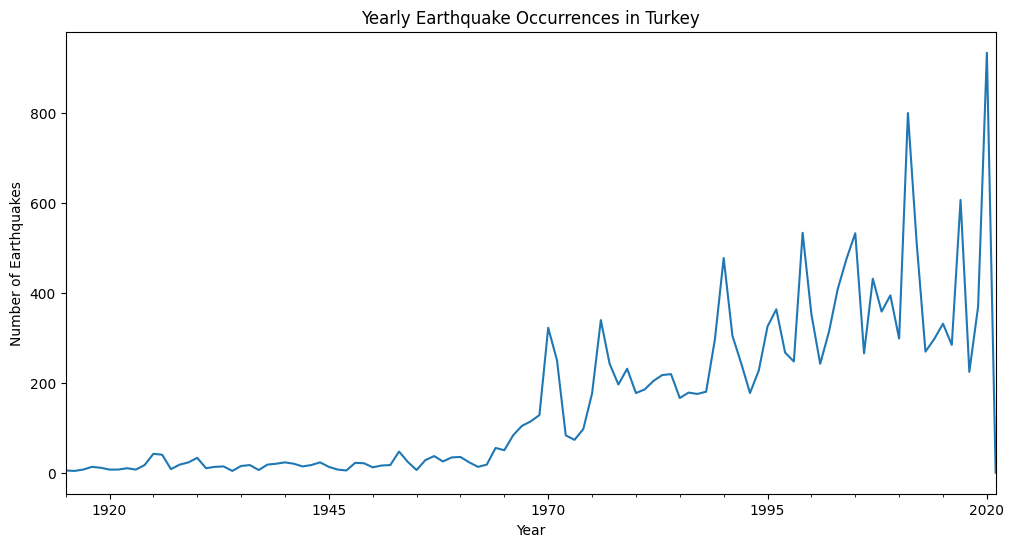

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Correcting the datetime conversion by ignoring errors
earthquake_data['DateTime'] = pd.to_datetime(earthquake_data['Olus tarihi'] + ' ' + earthquake_data['Olus zamani'], errors='coerce')

# Dropping rows where DateTime conversion failed
earthquake_data = earthquake_data.dropna(subset=['DateTime'])

# Now proceed with the Time Series Plot
plt.figure(figsize=(12, 6))
earthquake_data.set_index('DateTime').resample('Y').size().plot(title='Yearly Earthquake Occurrences in Turkey')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()


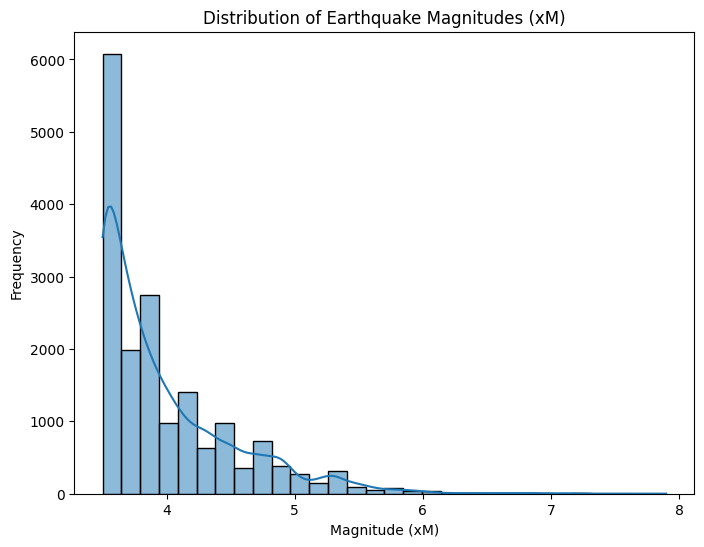

In [ ]:
# Histogram of Earthquake Magnitudes (xM)
plt.figure(figsize=(8, 6))
sns.histplot(earthquake_data['xM'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes (xM)')
plt.xlabel('Magnitude (xM)')
plt.ylabel('Frequency')
plt.show()


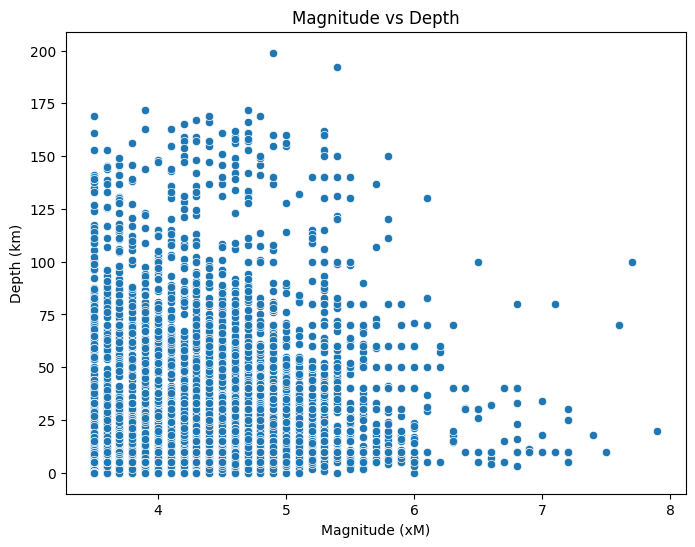

In [ ]:
# Scatter Plot of Magnitude vs Depth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='xM', y='Derinlik', data=earthquake_data)
plt.title('Magnitude vs Depth')
plt.xlabel('Magnitude (xM)')
plt.ylabel('Depth (km)')
plt.show()

<ipython-input-23-77292d3e0fb9>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


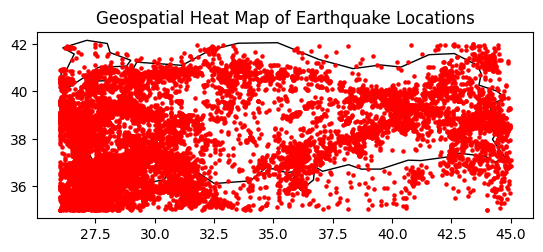

In [ ]:
# Geospatial Heat Map of Earthquake Locations
gdf = gpd.GeoDataFrame(earthquake_data, geometry=gpd.points_from_xy(earthquake_data.Boylam, earthquake_data.Enlem))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world[world.name == 'Turkey'].plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)
plt.title('Geospatial Heat Map of Earthquake Locations')
plt.show()

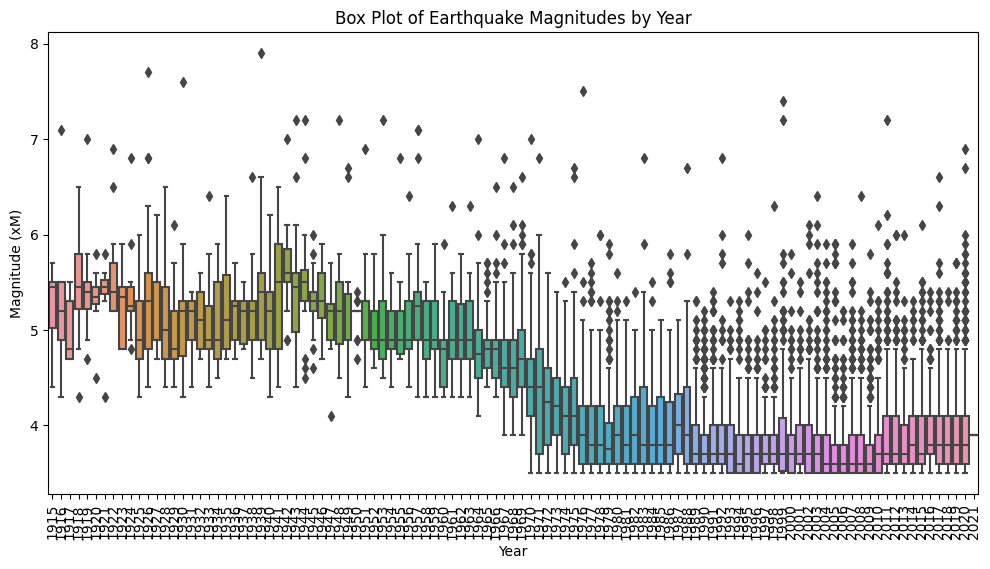

In [ ]:
# Box Plot of Earthquake Magnitudes by Year
earthquake_data['Year'] = earthquake_data['DateTime'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='xM', data=earthquake_data)
plt.xticks(rotation=90)
plt.title('Box Plot of Earthquake Magnitudes by Year')
plt.xlabel('Year')
plt.ylabel('Magnitude (xM)')
plt.show()

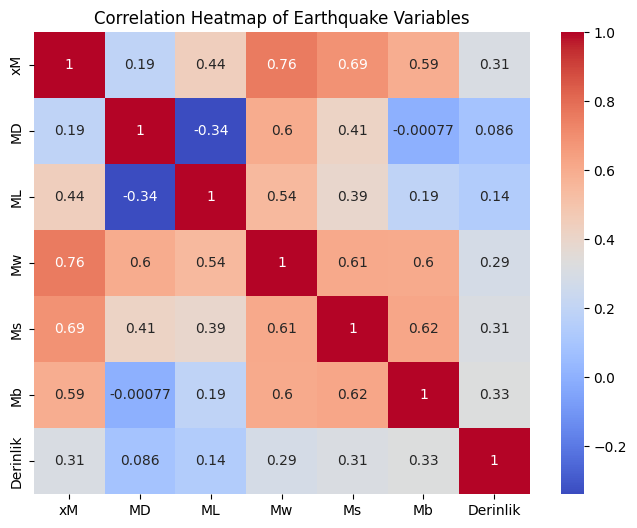

In [ ]:
# Correlation Heatmap
corr_matrix = earthquake_data[['xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Derinlik']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Earthquake Variables')
plt.show()

In [ ]:
sns.pairplot(earthquake_data[['xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Derinlik']],height=1.5,diag_kind='kde')
plt.tight_layout()
plt.show()

## ///////////////////nvess dataset////////////////

In [ ]:
import pandas as pd

file_path = '/content/TURHEC-catalogue.dat'

# Lists to hold lines with different field counts
lines_with_48_fields = []
lines_with_49_fields = []

# Read the file line by line
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i < 2:  # Skip the first two header lines
            continue
        fields = line.split()
        if len(fields) == 48:
            lines_with_48_fields.append(line)
        elif len(fields) == 49:
            lines_with_49_fields.append(line)

# Convert lists to DataFrames
df_48 = pd.DataFrame([sub.split() for sub in lines_with_48_fields])
df_49 = pd.DataFrame([sub.split() for sub in lines_with_49_fields])

# Display the first few rows of each DataFrame
print("First few rows of the DataFrame with 48 fields:")
print(df_48.head())
print("\nFirst few rows of the DataFrame with 49 fields:")
print(df_49.head())


First few rows of the DataFrame with 48 fields:
     0   1   2   3   4       5  6     7        8        9   ...    38     39  \
0  1911  04  04  15  43  47.340  n  3.75  36.4063  25.8835  ...  0.00  -1.00   
1  1918  09  29  12  07  14.310  n  3.39  35.0767  35.6078  ...  0.00  -1.00   
2  1922  08  13  00  09  55.160  n  4.20  35.3242  27.5466  ...  0.00  -1.00   
3  1926  06  26  19  46  33.020  n  3.88  36.6810  26.7955  ...  0.00  -1.00   
4  1926  07  05  09  21  54.000  n  0.00  36.5000  27.0000  ...  0.00  -1.00   

     40   41 42   43 44        45            46       47  
0  0.00  7.0  s  7.1  #  16958138    Dodecanese  Islands  
1  0.00  6.4  s  6.6  #    913295  Jordan-Syria   region  
2  0.00  6.8  s  6.9  #    911975    Dodecanese  Islands  
3  0.00  7.4  s  7.4  #    909893    Dodecanese  Islands  
4  0.00  5.5  s  5.8  #    909918    Dodecanese  Islands  

[5 rows x 48 columns]

First few rows of the DataFrame with 49 fields:
     0   1   2   3   4       5  6     7      

In [ ]:
# Define the column names
column_names = [
    'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Flag1', 'RMS', 'Latitude',
    'Longitude', 'Flag2', 'Smax', 'Smin', 'Depth', 'Flag3', 'Herr', 'Nsta', 'Gap',
    'Minx', 'Maxx', 'Type', 'Ins', 'Pr', 'M', 'Sd1', 'Med1', 'Md', 'Sd2', 'Med2',
    'ML', 'Sd3', 'Med3', 'Mb', 'Sd4', 'Med4', 'Ms', 'Sd5', 'Med5', 'Mw', 'Sd6',
    'Med6', 'Mx', 'MxTyp', 'Mw*', 'Number', 'ISC_INFO'
]

# Adjusting the DataFrame creation to merge the last two columns of df_48 and last three columns of df_49 into one 'Region' column

# Set column names for df_48 and df_49
df_48.columns = column_names + ['Region1', 'Region2']
df_49.columns = column_names + ['Region1', 'Region2', 'Region3']

# Merge the last two columns of df_48 into one 'Region' column
df_48['Region'] = df_48[['Region1', 'Region2']].apply(lambda x: ' '.join(x), axis=1)

# Merge the last three columns of df_49 into one 'Region' column
df_49['Region'] = df_49[['Region1', 'Region2', 'Region3']].apply(lambda x: ' '.join(x), axis=1)

# Drop the now unnecessary columns
df_48_cleaned = df_48.drop(columns=['Region1', 'Region2','Number','ISC_INFO'])
df_49_cleaned = df_49.drop(columns=['Region1', 'Region2', 'Region3','Number','ISC_INFO'])

# Merging both DataFrames into one
df_combined = pd.concat([df_48_cleaned, df_49_cleaned], ignore_index=True)

# Display the first few rows of the combined DataFrame
df_combined.head()

,Year,Month,Day,Hour,Minute,Second,Flag1,RMS,Latitude,Longitude,...,Ms,Sd5,Med5,Mw,Sd6,Med6,Mx,MxTyp,Mw*,Region
0,1911,04,04,15,43,47.340,n,3.75,36.4063,25.8835,...,7.00,-1.00,7.00,0.00,-1.00,0.00,7.0,s,7.1,Dodecanese Islands
1,1918,09,29,12,07,14.310,n,3.39,35.0767,35.6078,...,6.40,-1.00,6.40,0.00,-1.00,0.00,6.4,s,6.6,Jordan-Syria region
2,1922,08,13,00,09,55.160,n,4.20,35.3242,27.5466,...,6.80,0.00,6.80,0.00,-1.00,0.00,6.8,s,6.9,Dodecanese Islands
3,1926,06,26,19,46,33.020,n,3.88,36.6810,26.7955,...,7.40,0.50,7.40,0.00,-1.00,0.00,7.4,s,7.4,Dodecanese Islands
4,1926,07,05,09,21,54.000,n,0.00,36.5000,27.0000,...,5.50,-1.00,5.50,0.00,-1.00,0.00,5.5,s,5.8,Dodecanese Islands


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133266 entries, 0 to 133265
Data columns (total 45 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Year       133266 non-null  object
 1   Month      133266 non-null  object
 2   Day        133266 non-null  object
 3   Hour       133266 non-null  object
 4   Minute     133266 non-null  object
 5   Second     133266 non-null  object
 6   Flag1      133266 non-null  object
 7   RMS        133266 non-null  object
 8   Latitude   133266 non-null  object
 9   Longitude  133266 non-null  object
 10  Flag2      133266 non-null  object
 11  Smax       133266 non-null  object
 12  Smin       133266 non-null  object
 13  Depth      133266 non-null  object
 14  Flag3      133266 non-null  object
 15  Herr       133266 non-null  object
 16  Nsta       133266 non-null  object
 17  Gap        133266 non-null  object
 18  Minx       133266 non-null  object
 19  Maxx       133266 non-null  object
 20  Type

In [ ]:
# Overview of the dataset
dataset2_overview = {
    "Dataset Shape": df_combined.shape,
    "Data Types": df_combined.dtypes,
    "Missing Values": df_combined.isnull().sum(),
    "Descriptive Statistics": df_combined.describe()
}

dataset2_overview

{'Dataset Shape': (133266, 45),
 'Data Types': Year         object
 Month        object
 Day          object
 Hour         object
 Minute       object
 Second       object
 Flag1        object
 RMS          object
 Latitude     object
 Longitude    object
 Flag2        object
 Smax         object
 Smin         object
 Depth        object
 Flag3        object
 Herr         object
 Nsta         object
 Gap          object
 Minx         object
 Maxx         object
 Type         object
 Ins          object
 Pr           object
 M            object
 Sd1          object
 Med1         object
 Md           object
 Sd2          object
 Med2         object
 ML           object
 Sd3          object
 Med3         object
 Mb           object
 Sd4          object
 Med4         object
 Ms           object
 Sd5          object
 Med5         object
 Mw           object
 Sd6          object
 Med6         object
 Mx           object
 MxTyp        object
 Mw*          object
 Region       object
 dtype: o

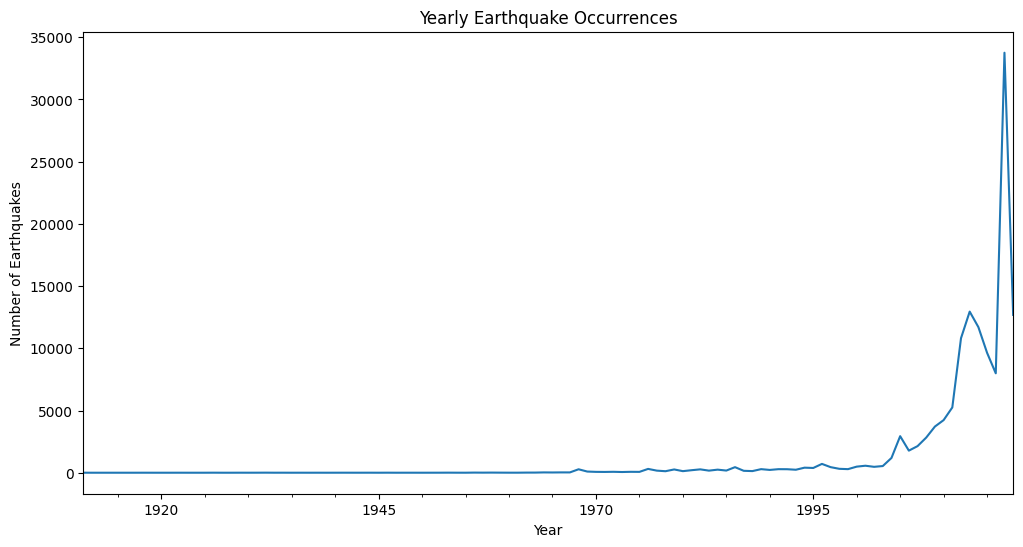

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Öncelikle, tarih ve saat sütunlarının tipini kontrol edin
df_combined[['Year', 'Month', 'Day', 'Hour', 'Minute']] = df_combined[['Year', 'Month', 'Day', 'Hour', 'Minute']].apply(pd.to_numeric, errors='coerce')

# DateTime sütununu oluşturun
df_combined['DateTime'] = pd.to_datetime(df_combined[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Zaman serisi grafiğini çizin
plt.figure(figsize=(12, 6))
df_combined.set_index('DateTime').resample('Y').size().plot(title='Yearly Earthquake Occurrences')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()


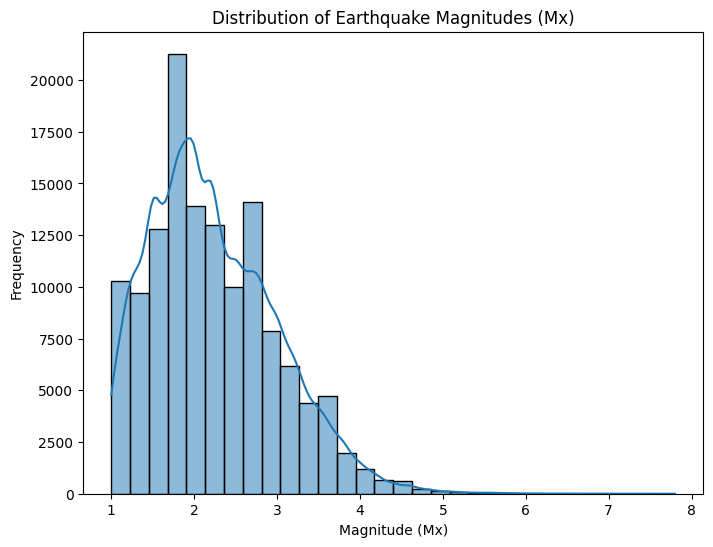

In [ ]:
# xM sütununu sayısal formata dönüştürme
df_combined['Mx_numeric'] = pd.to_numeric(df_combined['Mx'], errors='coerce')

# Histogram of Earthquake Magnitudes (xM)
plt.figure(figsize=(8, 6))
sns.histplot(df_combined['Mx_numeric'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes (Mx)')
plt.xlabel('Magnitude (Mx)')
plt.ylabel('Frequency')
plt.show()

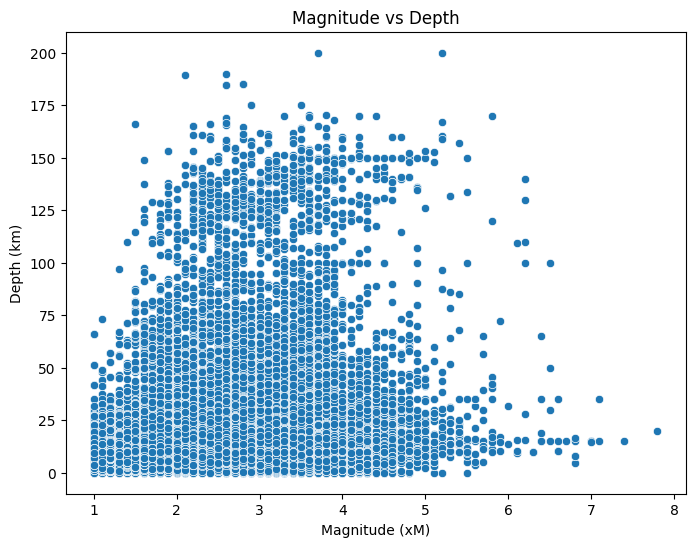

In [ ]:
# xM ve Derinlik sütunlarını sayısal formata dönüştürme
df_combined['Mx_numeric'] = pd.to_numeric(df_combined['Mx'], errors='coerce')
df_combined['Derinlik_numeric'] = pd.to_numeric(df_combined['Depth'], errors='coerce')

# Scatter Plot of Magnitude vs Depth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mx_numeric', y='Derinlik_numeric', data=df_combined)
plt.title('Magnitude vs Depth')
plt.xlabel('Magnitude (xM)')
plt.ylabel('Depth (km)')
plt.show()


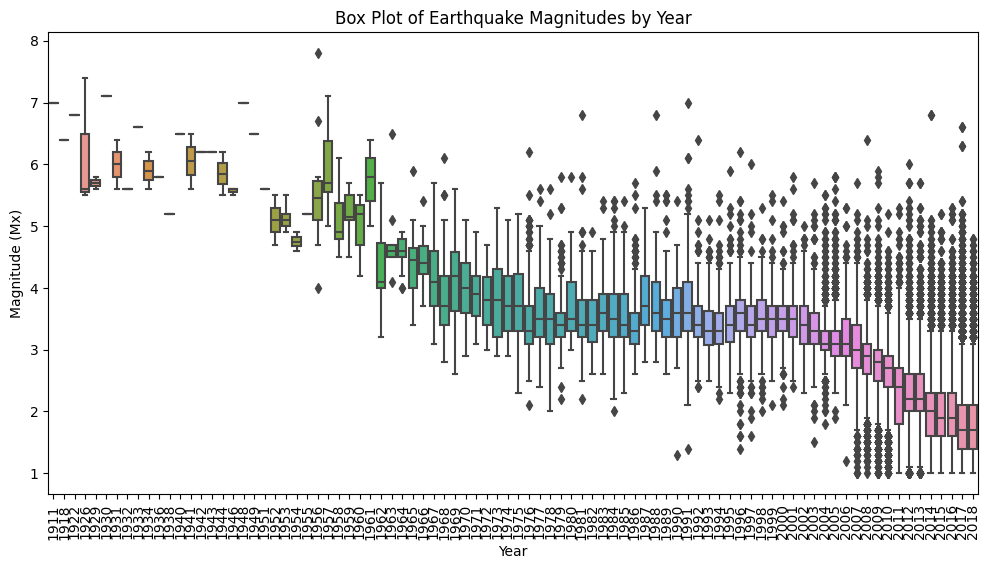

In [ ]:
# DateTime ve xM sütunlarını dönüştürme
df_combined['DateTime'] = pd.to_datetime(df_combined['DateTime'], errors='coerce')
df_combined['Mx'] = pd.to_numeric(df_combined['Mx'], errors='coerce')

# Yılı çıkarma
df_combined['Year'] = df_combined['DateTime'].dt.year

# Kutu grafiği çizimi
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Mx', data=df_combined)
plt.xticks(rotation=90)
plt.title('Box Plot of Earthquake Magnitudes by Year')
plt.xlabel('Year')
plt.ylabel('Magnitude (Mx)')
plt.show()


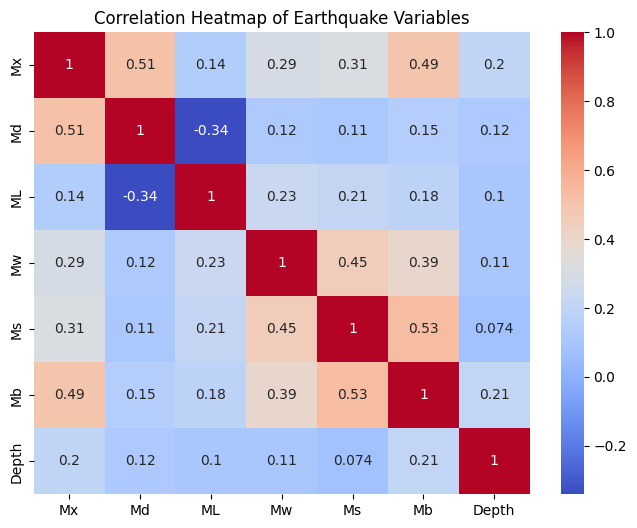

In [ ]:
# İlgili sütunları sayısal formata dönüştürme
for col in ['Mx', 'Md', 'ML', 'Mw', 'Ms', 'Mb', 'Depth']:
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')

# Korelasyon matrisini hesaplama
corr_matrix = df_combined[['Mx', 'Md', 'ML', 'Mw', 'Ms', 'Mb', 'Depth']].corr()

# Korelasyon ısı haritasını çizme
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Earthquake Variables')
plt.show()


### **Kandilli Rasathane Datası**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the data from the text file
file_path = '/content/1915-2023.txt'  # Replace with your file path

# Try different encodings if 'utf-8' does not work
try:
    earthquake_data3 = pd.read_csv(file_path, encoding='utf-8',sep="\t")
except UnicodeDecodeError:
    earthquake_data3 = pd.read_csv(file_path, encoding='latin1',sep="\t")  # or 'iso-8859-1' or 'cp1252'

earthquake_data3.head()


,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,20230831083800,2023.08.31,08:38:00.25,36.0547,27.1385,7.7,3.7,0.0,3.6,3.7,0.0,0.0,Ke,AKDENIZ
1,2,20230829060305,2023.08.29,06:03:05.24,38.0215,38.3377,6.3,3.9,0.0,3.8,3.9,0.0,0.0,Ke,YESILYAYLA-CELIKHAN (ADIYAMAN) [South 3.2 km]
2,3,20230829045814,2023.08.29,04:58:14.13,38.9088,32.9598,3.5,5.1,0.0,5.1,4.9,0.0,0.0,Ke,TAVSANCALI-KULU (KONYA) [South West 5.1 km]
3,4,20230827030942,2023.08.27,03:09:42.97,36.3487,27.8080,65.3,4.4,0.0,4.4,0.0,0.0,0.0,Ke,AKDENIZ
4,5,20230826091713,2023.08.26,09:17:13.88,35.8478,35.9930,8.1,3.6,0.0,3.5,3.6,0.0,0.0,Ke,YAYLADAGI (HATAY) [South West 8.8 km]


In [5]:
earthquake_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20174 entries, 0 to 20173
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           20174 non-null  int64  
 1   Deprem Kodu  20174 non-null  int64  
 2   Olus tarihi  20174 non-null  object 
 3   Olus zamani  20174 non-null  object 
 4   Enlem        20174 non-null  float64
 5   Boylam       20174 non-null  float64
 6   Der(km)      20174 non-null  float64
 7   xM           20174 non-null  float64
 8   MD           20174 non-null  float64
 9   ML           20174 non-null  float64
 10  Mw           7193 non-null   float64
 11  Ms           20174 non-null  float64
 12  Mb           20174 non-null  float64
 13  Tip          20174 non-null  object 
 14  Yer          20174 non-null  object 
dtypes: float64(9), int64(2), object(4)
memory usage: 2.3+ MB


In [6]:
# Overview of the dataset
dataset_overview3 = {
    "Dataset Shape": earthquake_data3.shape,
    "Data Types": earthquake_data3.dtypes,
    "Missing Values": earthquake_data3.isnull().sum(),
    "Descriptive Statistics": earthquake_data3.describe()
}

dataset_overview3

{'Dataset Shape': (20174, 15),
 'Data Types': No               int64
 Deprem Kodu      int64
 Olus tarihi     object
 Olus zamani     object
 Enlem          float64
 Boylam         float64
 Der(km)        float64
 xM             float64
 MD             float64
 ML             float64
 Mw             float64
 Ms             float64
 Mb             float64
 Tip             object
 Yer             object
 dtype: object,
 'Missing Values': No                 0
 Deprem Kodu        0
 Olus tarihi        0
 Olus zamani        0
 Enlem              0
 Boylam             0
 Der(km)            0
 xM                 0
 MD                 0
 ML                 0
 Mw             12981
 Ms                 0
 Mb                 0
 Tip                0
 Yer                0
 dtype: int64,
 'Descriptive Statistics':              No       Deprem Kodu         Enlem        Boylam       Der(km)  \
 count  20174.000000  2.017400e+04  20174.000000  20174.000000  20174.000000   
 mean   10087.500000  1.999162

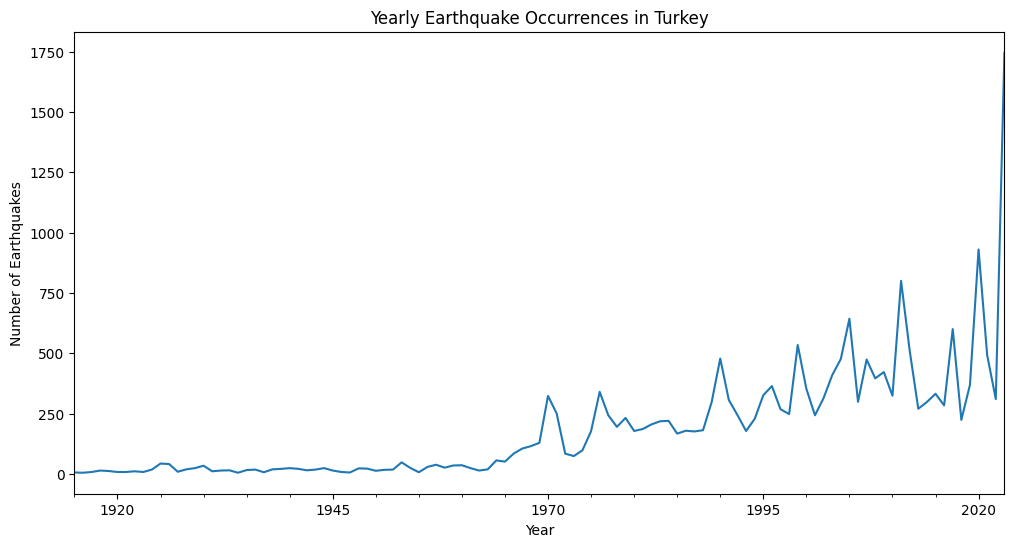

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Correcting the datetime conversion by ignoring errors
earthquake_data3['DateTime'] = pd.to_datetime(earthquake_data3['Olus tarihi'] + ' ' + earthquake_data3['Olus zamani'], errors='coerce')

# Dropping rows where DateTime conversion failed
earthquake_data3 = earthquake_data3.dropna(subset=['DateTime'])

# Now proceed with the Time Series Plot
plt.figure(figsize=(12, 6))
earthquake_data3.set_index('DateTime').resample('Y').size().plot(title='Yearly Earthquake Occurrences in Turkey')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()


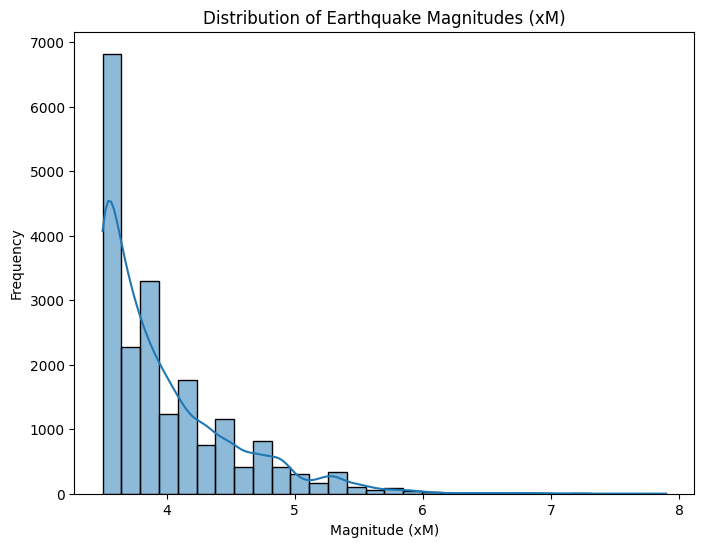

In [9]:
# Histogram of Earthquake Magnitudes (xM)
plt.figure(figsize=(8, 6))
sns.histplot(earthquake_data3['xM'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes (xM)')
plt.xlabel('Magnitude (xM)')
plt.ylabel('Frequency')
plt.show()

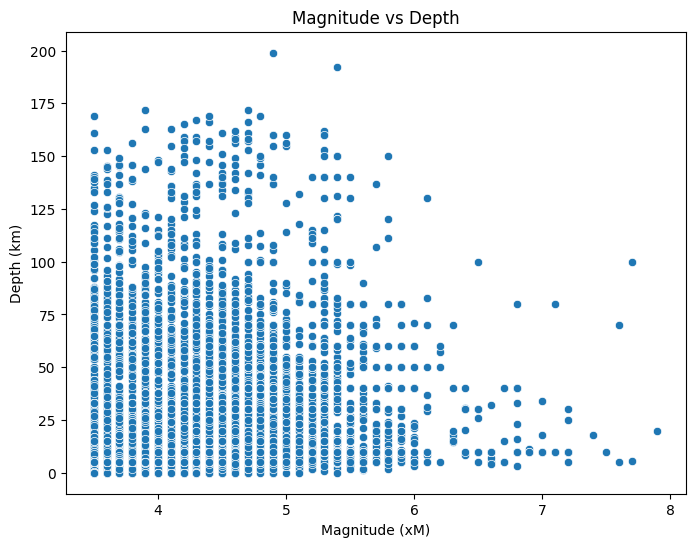

In [11]:
# Scatter Plot of Magnitude vs Depth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='xM', y='Der(km)', data=earthquake_data3)
plt.title('Magnitude vs Depth')
plt.xlabel('Magnitude (xM)')
plt.ylabel('Depth (km)')
plt.show()

<ipython-input-12-39e9409a1956>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


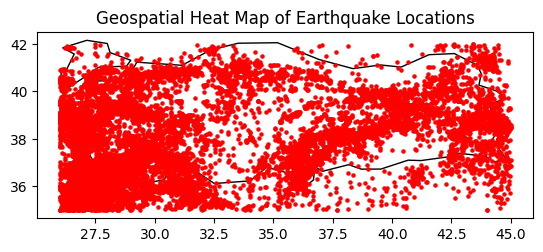

In [12]:
# Geospatial Heat Map of Earthquake Locations
gdf = gpd.GeoDataFrame(earthquake_data3, geometry=gpd.points_from_xy(earthquake_data3.Boylam, earthquake_data3.Enlem))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world[world.name == 'Turkey'].plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)
plt.title('Geospatial Heat Map of Earthquake Locations')
plt.show()

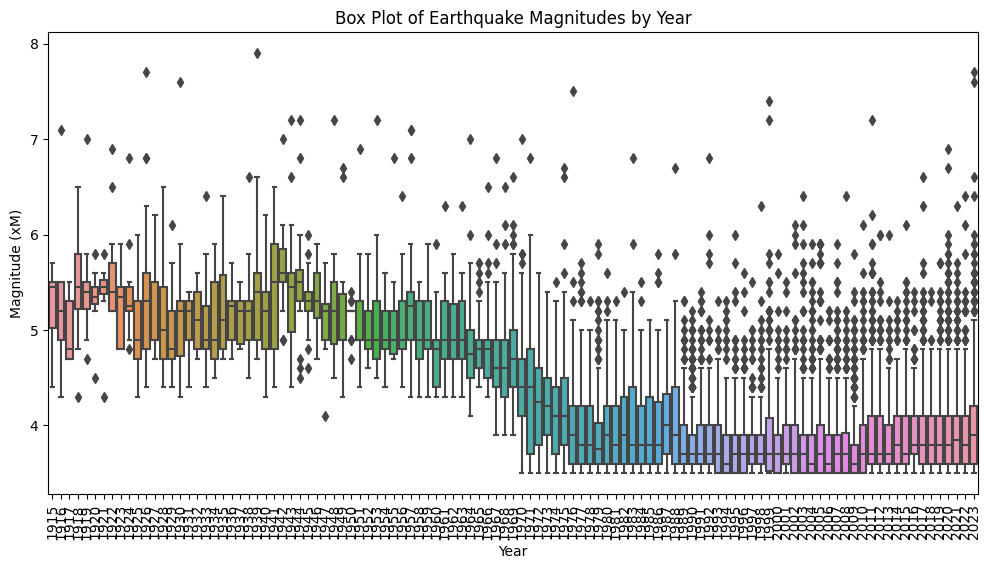

In [13]:
# Box Plot of Earthquake Magnitudes by Year
earthquake_data3['Year'] = earthquake_data3['DateTime'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='xM', data=earthquake_data3)
plt.xticks(rotation=90)
plt.title('Box Plot of Earthquake Magnitudes by Year')
plt.xlabel('Year')
plt.ylabel('Magnitude (xM)')
plt.show()

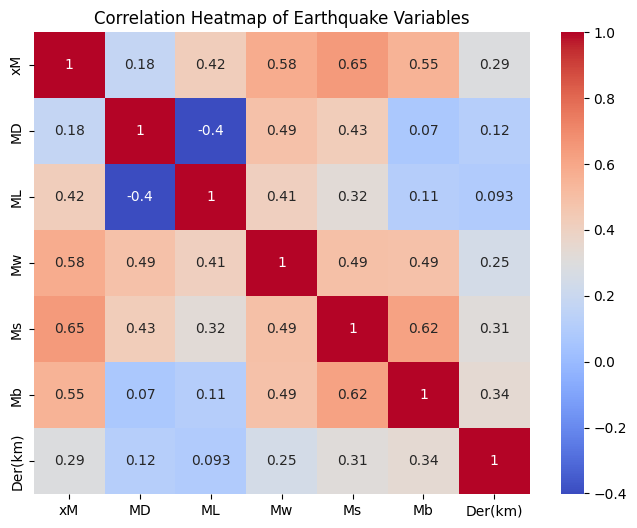

In [16]:
# Correlation Heatmap
corr_matrix = earthquake_data3[['xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Der(km)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Earthquake Variables')
plt.show()